# Assignment 3
write your names here

In [1]:
import numpy as np
# ! unzip mnist_train.zip

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

/var/folders/wd/4h5ts6z93_xb2x7l2x26_3j00000gn/T/ipykernel_62059/3614084286.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(folder + '/' + file).reshape(28*28)


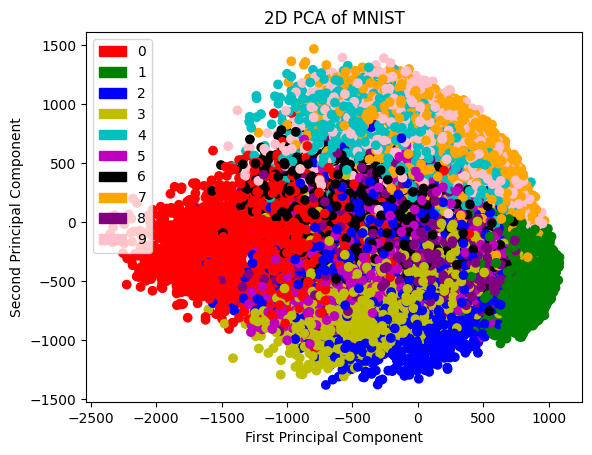

In [16]:
# Insert Code for Subtask 1.1 here
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import imageio
import os
directory = 'mnist'
num_samples = []
for i in range(10):
    num_samples.append(100)
    # Uncomment the next line and comment the previous line to load all images, but might lead to out of RAM
    # num_samples.append(len(os.listdir(directory + '/' + 'd' + str(i))))
N = sum(num_samples)
X = np.zeros((28*28, sum(num_samples)))
Y = np.zeros(N)
for i in range(10):
    folder = directory + '/' + 'd' + str(i)
    cnt = 0
    for j, file in enumerate(os.listdir(folder)):
        img = imageio.imread(folder + '/' + file).reshape(28*28)
        X[:, sum(num_samples[:i]) + j] = img
        Y[sum(num_samples[:i]) + j] = i
        cnt += 1
        if cnt == num_samples[i]:
            break


k = 2
S = linear_pca(X, k)
# Draw the scatter plot with different colors for different digits
np.random.seed(0)
perm = np.random.permutation(N)
S = S[:, perm]
Y_shuffled = Y[perm]
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'pink']
C = [colors[int(label)] for label in Y_shuffled]
# for i in range(10):
#     C[Y==i] = np.array([int(c) for c in colors[i]], dtype=float)/255
plt.scatter(S[0, :], S[1, :], c=C)
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, 10)]
plt.legend(handles=legend_patch)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA of MNIST')
plt.show()

In [12]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    N = K.shape[0]
    one = np.ones((N, N))
    H = np.eye(N) - one/N
    K_tilde = H @ K @ H
    # Compute the eigenvectors and eigenvalues of K_tilde
    eigenvalues, eigenvectors = np.linalg.eigh(K_tilde)
    # Sort the eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    # Compute the first k principal components
    S = np.diag(np.sqrt(eigenvalues[:k])) @ eigenvectors[:, :k].T
    return S

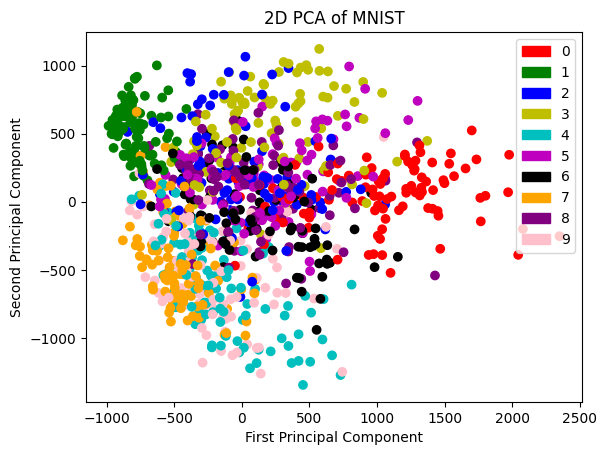

In [13]:
# Insert Code for Subtask 1.3 here
k = 2
K = np.dot(X.T, X)
S_gram = gram_pca(K, k)

# Draw the scatter plot with different colors for different digits
np.random.seed(0)
perm = np.random.permutation(N)
S_gram = S_gram[:, perm]
Y_shuffled = Y[perm]
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'pink']
C = [colors[int(label)] for label in Y_shuffled]
# for i in range(10):
#     C[Y==i] = np.array([int(c) for c in colors[i]], dtype=float)/255
plt.scatter(S_gram[0, :], S_gram[1, :], c=C)
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, 10)]
plt.legend(handles=legend_patch)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA of MNIST')
plt.show()

In [ ]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

In [ ]:
#Insert Code for Subtask 1.5 here